### Make a Grid of 2x2 Maps

In [1]:
%%capture
#!pip install geopandas --upgrade
!pip install geoplot;

In [12]:
import pandas as pd
import geopandas as gpd
pd.set_option("display.max.columns", None)  # Show all the columns
pd.options.display.float_format = '{:20,.2f}'.format #Get rid of the scientific notation
import matplotlib.pyplot as plt
import shapely as shply
import geoplot
import matplotlib as mpl

import geoplot.crs as gcrs



In [3]:
outFile = 'figures/denver_comparison.png'

upperLeft = 'shapefiles/obesity_colorado.shp'
lowerLeft = 'shapefiles/teethlost_colorado.shp'
upperRight = 'shapefiles/cholesterol_colorado.shp'
lowerRight = 'shapefiles/diabetes_colorado.shp'


ul = gpd.read_file(upperLeft)
ll = gpd.read_file(lowerLeft)
ur = gpd.read_file(upperRight)
lr = gpd.read_file(lowerRight)



In [15]:
#If we want our scales to be the same across our maps, we need to set that here

norm = False
cmap = 'Greens'

# normalizeScales = True
# norm = mpl.colors.Normalize(vmin=10, vmax=55)
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap='Greens').cmap

In [5]:
#Plot our hffi points on top
hffi = gpd.read_file("hffi_data_20122018_geocoded.csv")
type(hffi)

hffi['float_lat'] = pd.to_numeric(hffi['lat'], downcast='float')
hffi['float_long'] = pd.to_numeric(hffi['long'], downcast='float')

#Some fancy looping to populate our 'geometry' column
hffi['geometry'] = [shply.geometry.point.Point(xy) for xy in zip(hffi['float_long'], hffi['float_lat'])]


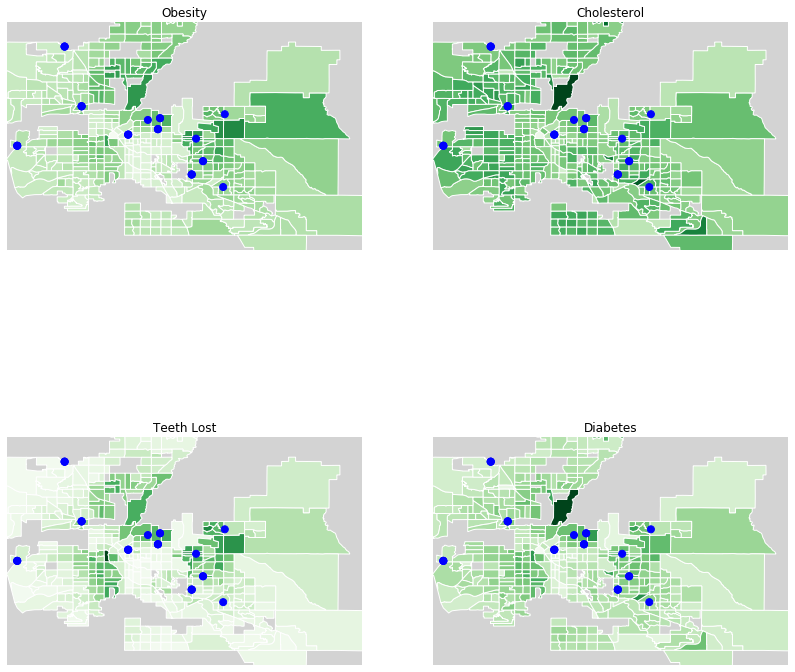

In [16]:

fig, axarr = plt.subplots(2, 2, figsize=(14, 14))

# ax2.set_title('Simple plot')
# axarr[0][0] = ax2

#zoom on LA (-118.48, 33.89, -118.07, 34.17)
#zooom on New Orleans (-90.14, 29.91, -89.91, 30.09)
#zoom on Memphis (-90.13, 35.01, -89.79, 35.21)
#zoom on Denver (-105.2, 39.54, -104.56, 39.95)

#The 'Extent' parameter in each of the graphs below controls what the map is zoomed in on

#UPPER LEFT
axarr[0][0].set_title('Obesity')
ax0 = geoplot.polyplot(ul, color='lightgrey', zorder=1, ax=axarr[0][0])
ax1 = geoplot.choropleth(ul.dropna(), ax=ax0, zorder=2, hue='Data_Value', cmap=cmap, edgecolor='white', legend=False)
geoplot.pointplot(hffi, s=7, ax=ax1, color='blue', norm=norm, extent = (-105.2, 39.54, -104.56, 39.95), zorder=3)


#LOWER LEFT
axarr[1][0].set_title('Teeth Lost')
ax0 = geoplot.polyplot(ll, color='lightgrey', zorder=1, ax=axarr[1][0])
ax1 = geoplot.choropleth(ll.dropna(), ax=ax0, zorder=2, hue='Data_Value', cmap=cmap, edgecolor='white', legend=False)
geoplot.pointplot(hffi, s=7, ax=ax1, color='blue', norm=norm, extent = (-105.2, 39.54, -104.56, 39.95), zorder=3)


#UPPER RIGHT
axarr[0][1].set_title('Cholesterol')
ax0 = geoplot.polyplot(ur, color='lightgrey', zorder=1, ax=axarr[0][1])
ax1 = geoplot.choropleth(ur.dropna(), ax=ax0, zorder=2, hue='Data_Value', cmap=cmap, edgecolor='white', legend=False)
geoplot.pointplot(hffi, s=7, ax=ax1, color='blue', norm=norm, extent = (-105.2, 39.54, -104.56, 39.95), zorder=3)


#LOWER RIGHT
axarr[1][1].set_title('Diabetes')
ax0 = geoplot.polyplot(lr, color='lightgrey', zorder=1, ax=axarr[1][1])
ax1 = geoplot.choropleth(lr.dropna(), ax=ax0, zorder=2, hue='Data_Value', cmap=cmap, edgecolor='white', legend=False)
geoplot.pointplot(hffi, s=7, ax=ax1, color='blue', norm=norm, extent = (-105.2, 39.54, -104.56, 39.95), zorder=3)


plt.show()


In [ ]:
fig.savefig(outFile)